<a href="https://colab.research.google.com/github/emerson-diego/ImersaoDadosAlura-3/blob/main/alura_imersao_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1 + 1

2

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados.columns = dados.columns.str.replace('-','')
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados

#É importante destacar que passamos o parâmetro inplace = True, esse parâmetro faz com que os dados sejam modificados no local e o dataframe será atualizado. Caso esse parâmetro não seja declarado, o default é inplace = False e o retorno será uma cópia do objeto e caso você queira, precisa salva-lo com um outro nome.

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

Nós utilizamos o Pandas para abrir o dataset, que estava no formato CSV, e para gerar um dataframe, uma tabela, para então começarmos a analisar e entender o que significava cada coluna. 


Queremos melhorar a visualização do nosso histograma de compostos e, como existem mais de 3.000 variações na nossa base de dados, decidimos elencar os 5 compostos que mais aparecem. Para isso, vamos usar a função value_counts (função presente na biblioteca Pandas e que conta a ocorrência dos diferentes valores) e, como queremos saber somente os 5 elementos mais frequentes, também declaramos o index[0:5]. Essa parte final, faz com que o value_countsse atenha à contagem dos maiores valores e apresente como resultado apenas o index do intervalo [0, 5[, ou seja, o nome dos 5 maiores valores.

In [ ]:
compostos = dados['composto'].value_counts()[0:5] # pega os 5 primeiros elementos, poderia usar ().index[:5]
compostos

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

In [ ]:
compostos.index

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
cod_compostos = compostos.index
dados.query('composto in @cod_compostos') #@ para referenciar a variável cod_compostos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775,0.4232,1.8460,-2.0940,0.1438,-0.6604,0.7243,0.0338,-0.0182,-0.2022,0.8827,


Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função querycomo parâmetro para o countplot, o nosso gráfico de barras. O countplot é um gráfico pré-programado da biblioteca Seaborne, por isso, precisaremos fazer a importação padrão da mesma (import seaborn as sns). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar sns.set(). Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca Matplotlib (fazendo, primeiramente, sua importação - import matplotlib.pyplt as plt). Também estamos definindo o tamanho do gráfico através da função figure e seu parâmetro figsize=(x, y)) e o título através do set_title('Título'). Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ax e então, definimos as demais configurações (por exemplo, ax.set_title('Título'). E, finalmente, para visualizar o gráfico de barras, usamos o plt.show().

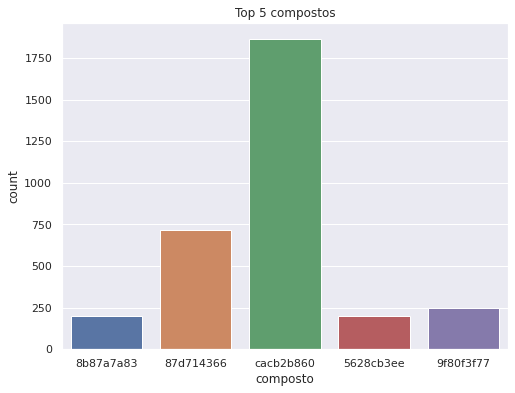

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #pega as configurações padrões do seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados? Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna g-0? Para responder essa questão, vamos usar a função unique() do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o len, pois assim, ele contará o tamanho desta lista de arrays.

In [ ]:
len(dados['g0'].unique())

14367


Como temos diversos compostos únicos dentro da coluna g-0, não é viável que façamos o mesmo gráfico utilizado anteriormente. Por isso, precisamos traçar uma nova estratégia para visualizar os nossos dadose aqui, usaremos um histograma. O primeiro passo, é identificar qual o valor mínimo (min()) e o valor máximo (max()) para entender qual o intervalo númerico com o qual estamos trabalhando.

In [ ]:
dados['g0'].min()

-5.513

In [ ]:
dados['g0'].max()

10.0

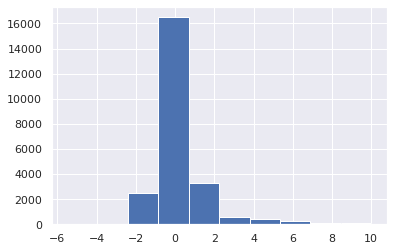

In [ ]:
dados['g0'].hist()

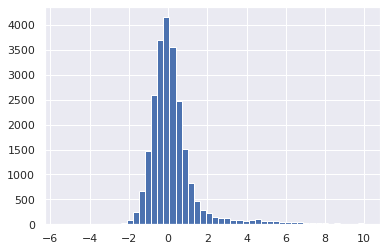

In [ ]:
dados['g0'].hist(bins=50)


Depois que reconhecemos que o nosso intervalo vai de ~5,5 a 10,0, podemos partir para o histograma e a função que usaremos para plotar é do Pandas (dataframe['variável'].hist()). Assim que rodamos essa função, percebemos que a visualização destes dados ainda não está boa pois, a divisão padrão das barras do histograma, representam intervalos muito grandes que atrapalham o entendimento dos dados. Por isso, acresentamos um parâmetro dentro da função (bins = número de quebras) para melhor dividir e, consequentemente visualizar os dados. Quando definimos os bins em 100, podemos perceber que a forma se aproxima bastante de uma curva bastante conhecida: a curva normal.

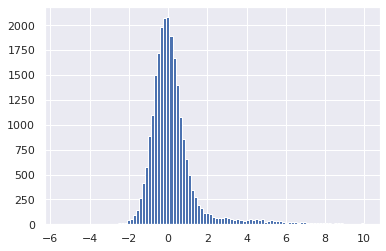

In [ ]:
dados['g0'].hist(bins=100)

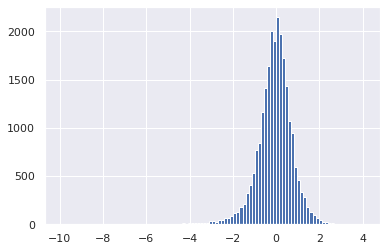

In [ ]:
dados['g19'].hist(bins=100)

In [ ]:
dados['g0'].mean()

0.24836629293692816


Como concluimos que plotar os gráficos de todos os genes é inviável, vamos analisar resumidamente algumas estatísticas sobre eles. Para isso, vamos usar a função describe do Pandas que já calcula e descreve algumas estatísticas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo, alguns quartis e máximo).

In [ ]:
dados.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

Neste ponto, vamos separar as variáveis que queremos analisar da base de dados (exemplo: g-0 e g-1) através de uma lista de arrays. Entretanto, apesar desta ser uma ótima estratégia para a separação, temos 771 genes e escrevê-los um a um seria muito trabalhoso e podemos fazer de uma outra forma.

In [ ]:
dados[{'g0', 'g1'}]

,g1,g0
0,0.5577,1.0620
1,0.4087,0.0743
2,0.5817,0.6280
3,-0.2491,-0.5138
4,-0.4009,-0.3254
...,...,...
23809,-0.0636,0.1394
23810,0.3478,-1.3260
23811,0.3756,0.3942
23812,0.2324,0.6660


In [ ]:
dados.loc[0,'g0'] # linha e coluna

1.062

Uma estratégia mais direta em que não precisaremos escrever a lista gene a gene, é o uso da função loc[] do Pandas. Como argumentos, passamos primeiramente o :, os dois pontos faz com que o loc[]retorne todos os elementos de uma determinada coluna, isso é importante quando não sabemos qual a quantidade de linhas de um dataframe. E, o segundo elemento, passamos as colunas que são de nosso interesse. No caso, queremos que a função nos retorne todos os elementos das colunas g-0até g-771. E, por fim, podemos declarar a nossa função de interesse a partir deste filtro realizado nos dados, o describe().

In [ ]:
dados.loc[:,'g0':'g771'].describe() # : pega todas as linhas

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900


Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas. Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o describe() que fizemos a partir do loc[] e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa). Para isso, vamos usar o .T[] no código anterior que produzimos para organizar o describe(). Ou seja, vamos manter todo o código até o describe() e, ao final, acrescentaremos o .T[]. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do .T[] a estatística alvo (.T['estatística']) e, por último, acrescentamos o .hist(bins = número de quebras) para que o histograma seja observado.

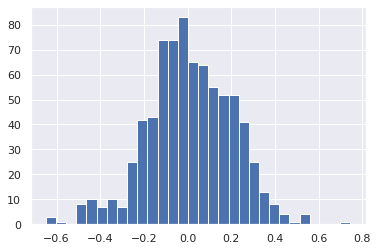

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=30) #inverte linhas e colunas

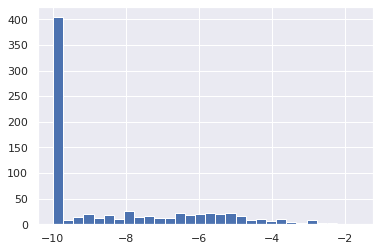

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30)

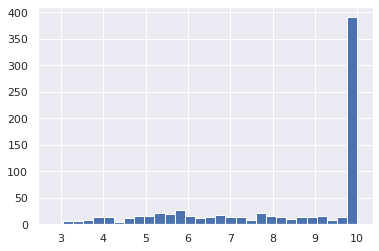

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30)

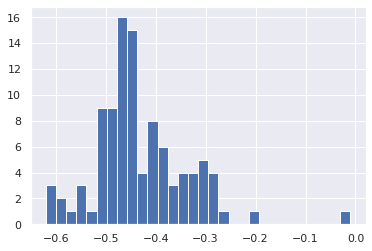

In [ ]:
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=30)

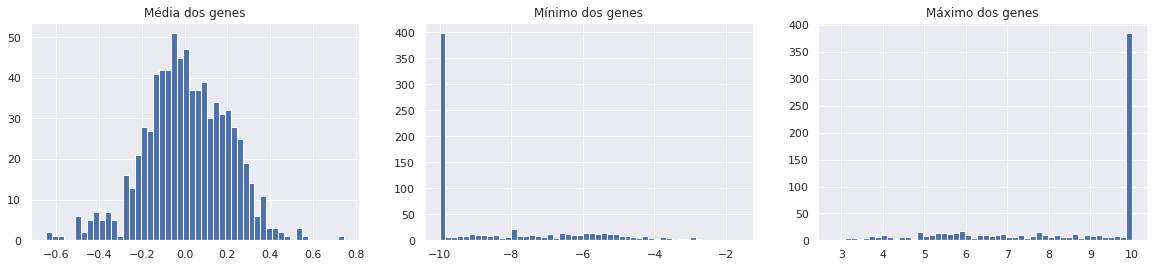

In [ ]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=50,ax=ax[0]).set_title("Média dos genes")
dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=50,ax=ax[1]).set_title("Mínimo dos genes")
dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=50,ax=ax[2]).set_title("Máximo dos genes")
fig.show()

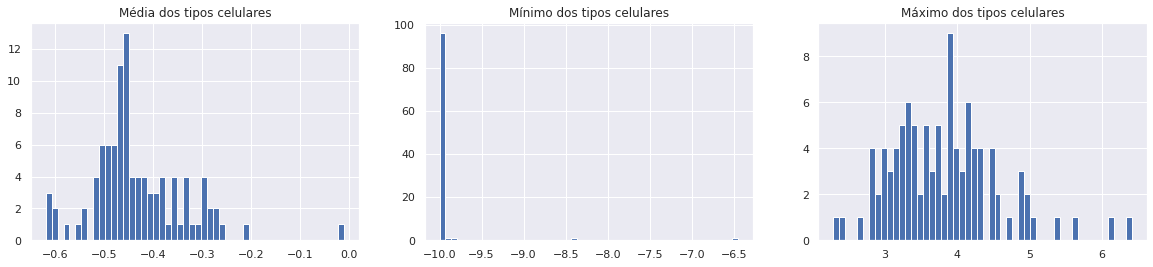

In [ ]:

fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=50,ax=ax[0]).set_title("Média dos tipos celulares")
dados.loc[:,'c0':'c99'].describe().T['min'].hist(bins=50,ax=ax[1]).set_title("Mínimo dos tipos celulares")
dados.loc[:,'c0':'c99'].describe().T['max'].hist(bins=50,ax=ax[2]).set_title("Máximo dos tipos celulares")
fig.show()


Um outro tipo de gráfico super interessante e útil é o boxplot. Para visualizá-lo, vamos usar a função boxplotdo Seaborn e, como argumentos dessa função vamos passar um x, onde x = coluna que será plotada neste eixo e a base de dados data = conjunto de dados. O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal). O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

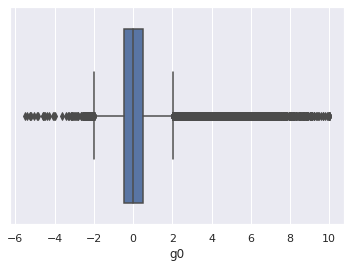

In [ ]:
sns.boxplot(x='g0', data=dados)


Podemos também, além de definir apenas os dados que irão no eixo x, definimos os dados para o outro eixo, atribuindo um valor para o parâmetro y (y = variável que vai ser plotada neste eixo). Como podemos perceber, no boxplot que representa o tratamento = com_droga apresenta muitos outliers e isso gera uma discussão bastante interessante pois, do ponto de vista biológico a investigação desses pontos é importante mas, dependendo da área que estamos trabalhando, esse ponto pode apresentar outras soluções. Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados mas também saber acerca do negócio que estamos tratando.

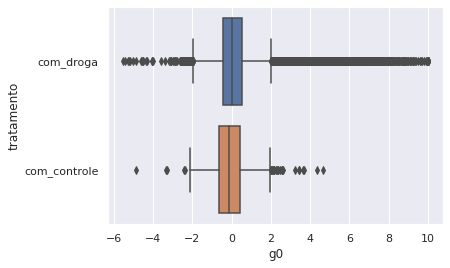

In [ ]:
sns.boxplot(x='g0',y = 'tratamento', data=dados)

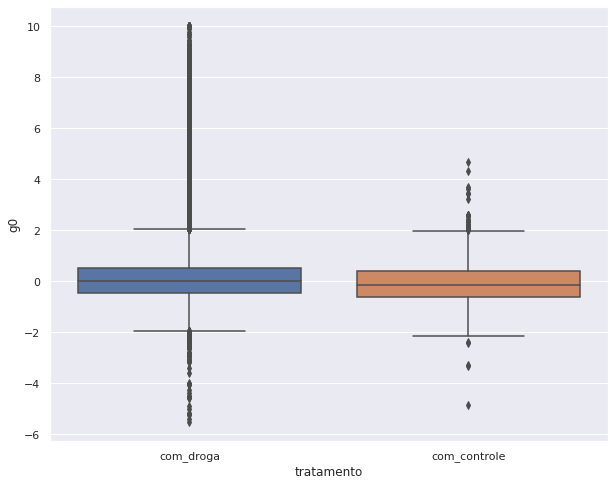

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0',x= 'tratamento', data=dados)

### Desafio 01: Ordenar o gráfico countplot
### Desafio 02: Melhorar a visualização alterando tamanho da fonte...
### Desafio 03: Plotar os histogramas com seaborn
### Desafio 04: Estudar sobre as estatísticas retonadas no .describe()
### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações
### Desafio 06: Fazer outras análises com o boxplot e até com o histograma
### Desafio 07: Resumo do que você aprendeu com os dados

###Desafio 01: Ordenar o gráfico countplot

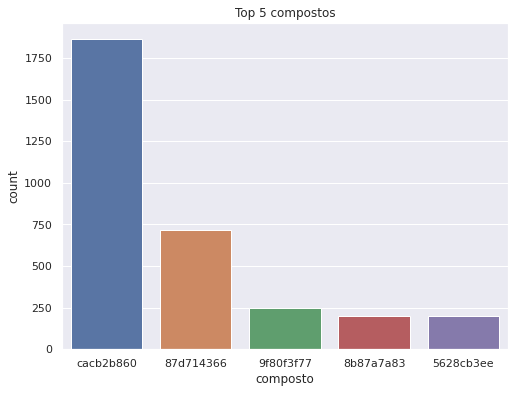

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #pega as configurações padrões do seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()



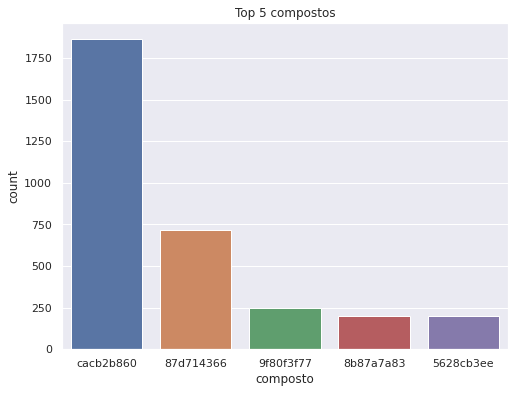

In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:5:1] # decrescente
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

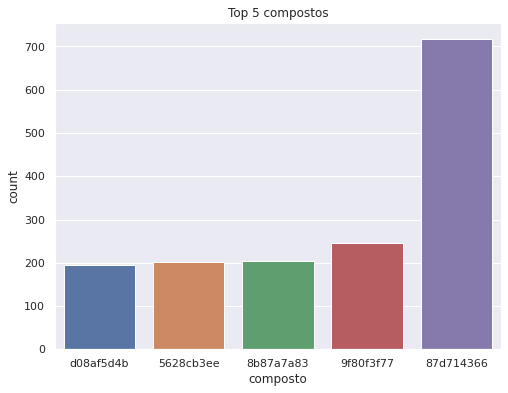

In [ ]:
cod_compostos = dados['composto'].value_counts().index[5:0:-1] # crescente
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

### Desafio 02: Melhorar a visualização alterando tamanho da fonte...

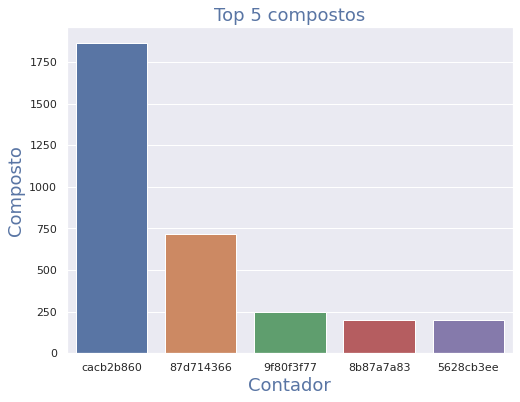

In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:5:1] # decrescente
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 compostos', fontsize=18, color = '#5975a4')
ax.set_xlabel('Contador', fontsize=18, color = '#5975a4')
ax.set_ylabel('Composto', fontsize=18, color = '#5975a4')
plt.show()

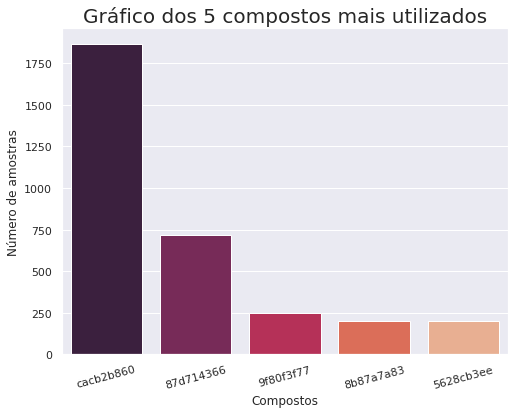

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=dados.query('composto in @cod_compostos'),        #utilização do query para relacionar a lista dos top5 com seus valores nos dados
    x='composto',                                                   
    order=cod_compostos,               #aqui ordenando os compostos segundo seu index na lista ordenada de ocorrências 
    palette="rocket")                           #utilização da palette de colors 'rocket', há muitas outas disponíveis na documentação
ax.set_title("Gráfico dos 5 compostos mais utilizados",fontsize=20)           #colocando título e alterando o tamanho
ax.set(xlabel="Compostos",ylabel="Número de amostras")           #set up dos eixos x e y
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)            #estilização do nome de cada composto, para ficar mais visível
plt.show()             #mostrando o gráfico montado de maneira mais limpa

### Desafio 03: Plotar os histogramas com seaborn

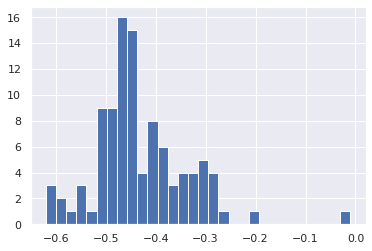

In [ ]:
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=30)

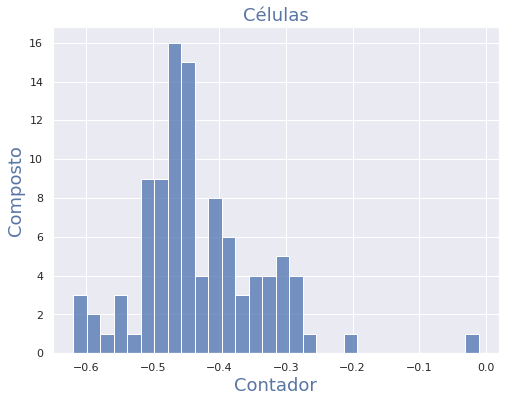

In [ ]:
celulas = dados.loc[:,'c0':'c99'].describe().T['mean']

plt.figure(figsize=(8, 6))

hist = sns.histplot(celulas, bins=30)
hist.set_title('Células', fontsize=18, color = '#5975a4')
hist.set_xlabel('Contador', fontsize=18, color = '#5975a4')
hist.set_ylabel('Composto', fontsize=18, color = '#5975a4')

plt.show()

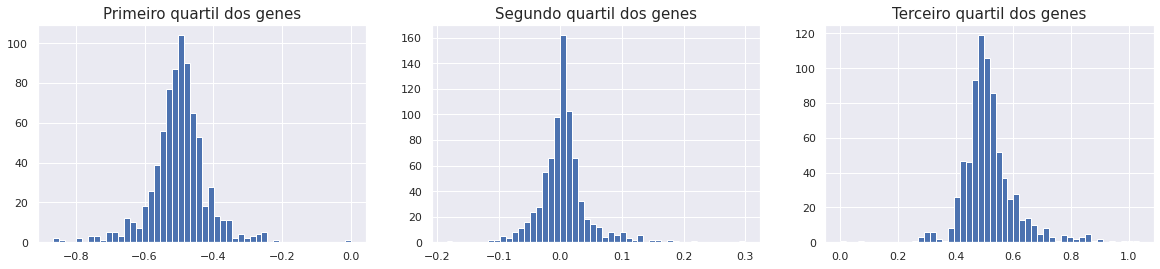

In [ ]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'g0':'g771'].describe().T['25%'].hist(bins=50,ax=ax[0]).set_title("Primeiro quartil dos genes", fontsize=15)
dados.loc[:,'g0':'g771'].describe().T['50%'].hist(bins=50,ax=ax[1]).set_title("Segundo quartil dos genes", fontsize=15)
dados.loc[:,'g0':'g771'].describe().T['75%'].hist(bins=50,ax=ax[2]).set_title("Terceiro quartil dos genes", fontsize=15)
fig.show()

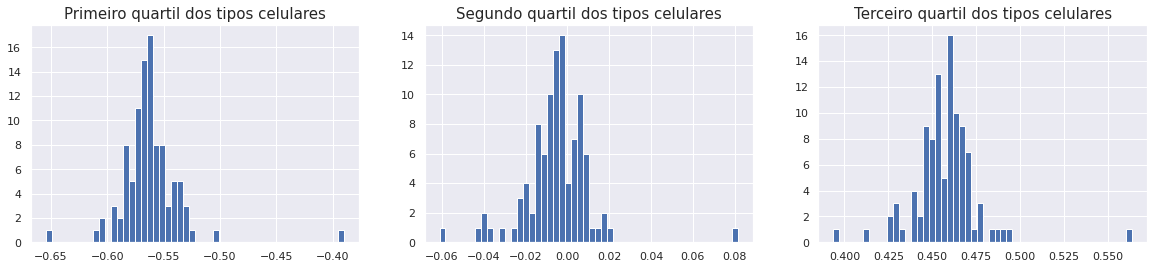

In [ ]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'c0':'c99'].describe().T['25%'].hist(bins=50,ax=ax[0]).set_title("Primeiro quartil dos tipos celulares", fontsize=15)
dados.loc[:,'c0':'c99'].describe().T['50%'].hist(bins=50,ax=ax[1]).set_title("Segundo quartil dos tipos celulares", fontsize=15)
dados.loc[:,'c0':'c99'].describe().T['75%'].hist(bins=50,ax=ax[2]).set_title("Terceiro quartil dos tipos celulares", fontsize=15)
fig.show()

Vemos que os genes apresentam uma distribuição muito mais regular do que os tipos celulares.

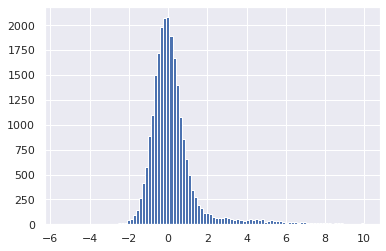

In [ ]:
dados['g0'].hist(bins = 100) #Versão com o Pandas

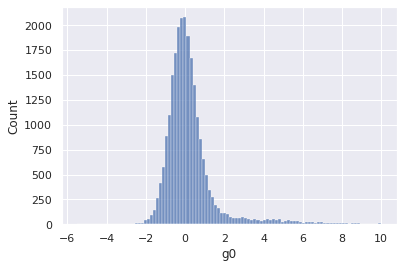

In [ ]:
sns.histplot(data=dados['g0'],bins=100) # Versão com o Seaborn

###Desafio 04: Estudar sobre as estatísticas retonadas no .describe()


[Link documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

INCLUIR ARTIGO SOBRE DESCRIBE

###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações

Analisando o box plot apresentado na aula, podemos ter varios tamanho, porém, o boxplot é geralmente apresentado como uma régua, ou seja, ele é mais bem visualizado com uma direção significativa. Para analisar apenas um parâmetro, seria melhor apresetá-lo na horizontal. Como abaixo, mas nota-se que no figsize, foi utilizado um tamanho que apresenta um maior comprimento do que altura:

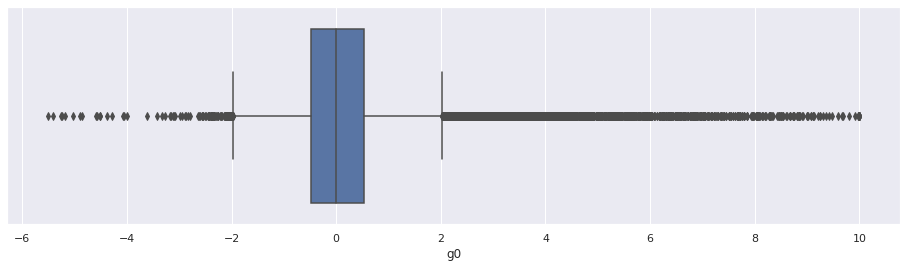

In [ ]:
plt.figure(figsize=(16,4))
sns.boxplot(x='g0', data=dados)


Quanto maior o comprimento, melhor será vizualizado os outliers da distribuição de dados.

Um artigo que pode lhe artigo que pode lhe ajudar nesse processo de reflexão é este aqui: [Visualizando informações com um gráfico](https://www.alura.com.br/artigos/visualizando-informacoes-com-um-grafico)



###Desafio 06: Fazer outras análises com o boxplot e até com o histograma.


Este artigo dá alguns exemplos de visualização: Análise de dados: [analisando minha distribuição com três alternativas de visualização](https://www.alura.com.br/artigos/analise-de-dados-analisando-minha-distribuicao-com-tres-alternativas-de-visualizacao)

Olhando para a Dose

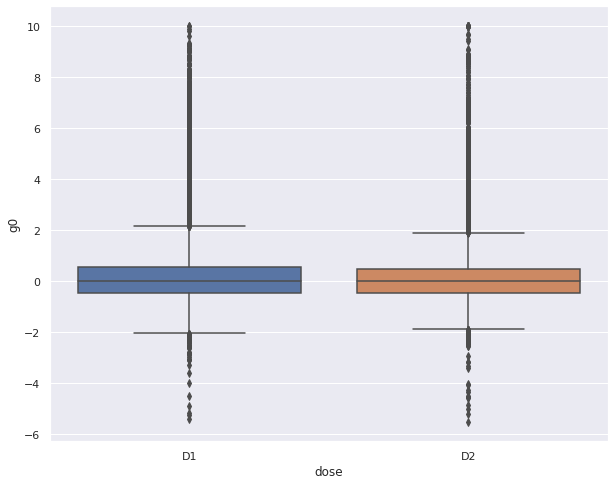

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x='dose' , data=dados)

Olhando apenas para o composto de controle

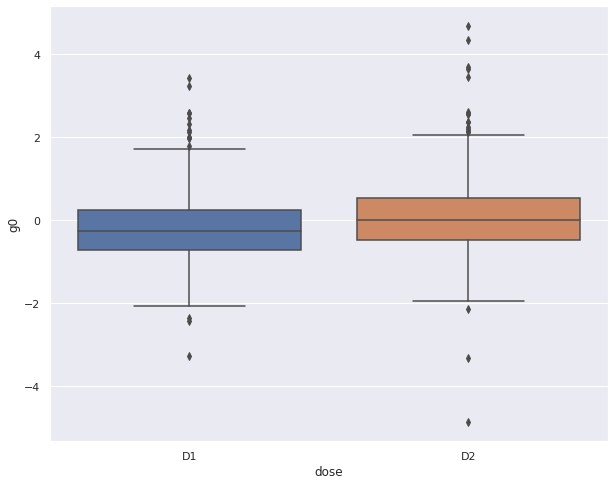

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x='dose' , data=dados.query('composto == "cacb2b860"'))

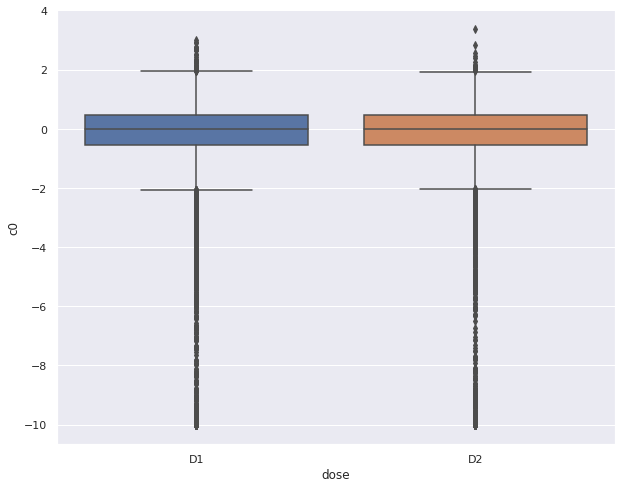

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c0', x='dose' , data=dados)

Olhando para o tempo

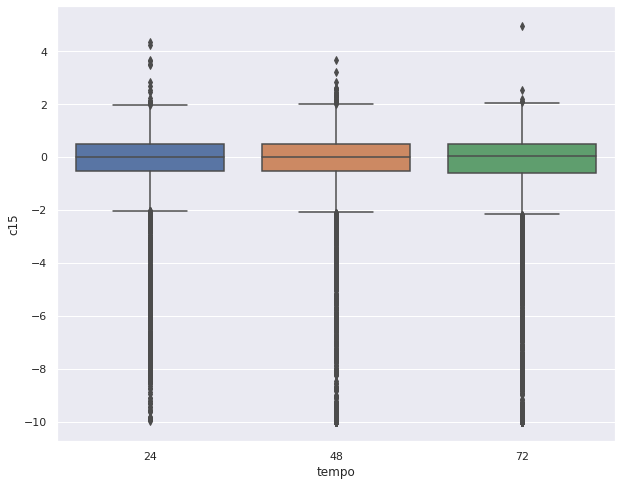

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c15', x='tempo' , data=dados)

Histograma de g-0 comparando com droga ou com controle

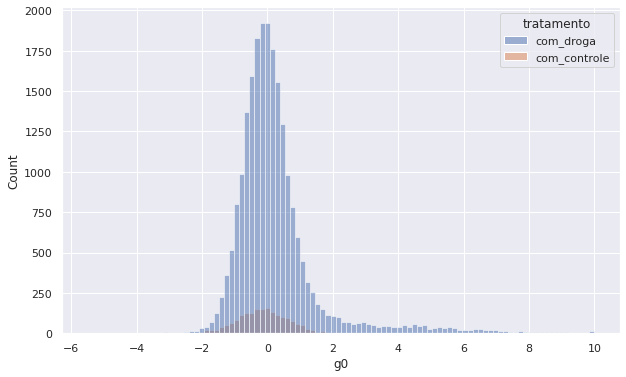

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=dados, x='g0', bins=100, hue='tratamento')
plt.show()

Fazer outras analises com o boxplot e até com o histograma.

Optei por analisar outro tipo de visualização de dados que fica entre um scatter plot e um box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


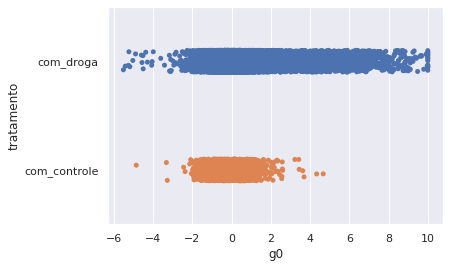

In [ ]:
sns.stripplot(x='g0',y='tratamento', data=dados, split=True)

###Desafio 07: Resumo do que você aprendeu com os dados

Resumo da análises

Os dados referentes aos genes e aos tipos celulares apresentam uma distruição que seria comparada a distribuição normal
os genes apresentam uma distribuição muito mais regular do que os tipos celulares